In [1]:
# Lista de Exercícios de Mineração de Dados
# Gustavo Nunes Lopes

In [2]:
# Questão 1
# A)

import pathlib
import numpy as np
import pandas as pd

def remove_incomplete_data(data: list):
    """
    Remover dados faltantes (-100) de uma lista de listas.
    Só adiciona à lista se todos os valores forem válidos.
    """
    cleaned_data = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == -100:
                break
        else:
            cleaned_data.append(data[i])

    return cleaned_data

def split_X_y(data: list):
    """
    Separa os dados em atributos (X) e rótulos (y).
    """
    X = np.array([row[:7] for row in data], dtype=float)
    y = np.array([row[7] for row in data])  # label

    return X, y

def accuracy_metric(actual, predicted):
    """
    Calcula a acurácia entre os valores reais e previstos.
    """
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1

    return correct / len(actual) * 100.0

def rocchio_train(X_train, y_train):
    """
    Treina o classificador Rocchio calculando os centróides para cada classe.
    """
    centroids = {}
    classes = np.unique(y_train)

    for c in classes:
        Xc = X_train[y_train == c]
        centroids[c] = np.mean(Xc, axis=0)  # vetor de 7 dimensões
    return centroids

def rocchio_predict(centroids, X_test):
    """ 
    Faz previsões usando o classificador Rocchio.
    """   
    classes = list(centroids.keys())
    y_pred = []

    for x in X_test:
        best_class = None
        best_dist = None

        for c in classes:
            d = euclidean_distance(x, centroids[c])
            if best_dist is None or d < best_dist:
                best_dist = d
                best_class = c

        y_pred.append(best_class)

    return np.array(y_pred)

def euclidean_distance(point1, point2):
    """
    Calcula a distância euclidiana entre dois pontos. 
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def nn_predict(X_train, y_train, X_test):
    """ 
    Faz previsões usando o classificador Nearest Neighbor (NN).
    """
    y_pred = []

    for x in X_test:
        best_dist = None
        best_label = None

        for i in range(len(X_train)):
            d = euclidean_distance(x, X_train[i])

            if best_dist is None or d < best_dist:
                best_dist = d
                best_label = y_train[i]

        y_pred.append(best_label)

    return np.array(y_pred)

# Main
# # Carregando os arquivos de texto
nebulosa_path_train = pathlib.Path().absolute() / 'db' / 'nebulosa_train.txt'
nebulosa_path_test = pathlib.Path().absolute() / 'db' / 'nebulosa_test.txt'

# Lendo os arquivos
with open(nebulosa_path_train, 'r') as file:
    nebulosa_train = file.read().split()
    new_nebulosa_train = []
    for i in range(0, len(nebulosa_train), 8):
        new_nebulosa_train.append(nebulosa_train[i:i+8])

    for i in range(len(new_nebulosa_train)):
        for j in range(len(new_nebulosa_train[i])):
            if j != 7:
                new_nebulosa_train[i][j] = float(new_nebulosa_train[i][j])

with open(nebulosa_path_test, 'r') as file:
    nebulosa_test = file.read().split()
    new_nebulosa_test = []
    for i in range(0, len(nebulosa_test), 8):
        new_nebulosa_test.append(nebulosa_test[i:i+8])

    for i in range(len(new_nebulosa_test)):
        for j in range(len(new_nebulosa_test[i])):
            if j != 7:
                new_nebulosa_test[i][j] = float(new_nebulosa_test[i][j])

# Removendo dados incompletos
nebulosa_train_cleaned = remove_incomplete_data(new_nebulosa_train)
nebulosa_test_cleaned = remove_incomplete_data(new_nebulosa_test)

# Verificando o tamanho dos datasets
print("Treino original:", len(new_nebulosa_train), " | Treino limpo:", len(nebulosa_train_cleaned))
print("Teste original :", len(new_nebulosa_test),  " | Teste limpo :", len(nebulosa_test_cleaned))

# Separando em treinamento e teste
X_train, y_train = split_X_y(nebulosa_train_cleaned)
X_test, y_test   = split_X_y(nebulosa_test_cleaned)

print("\n===== QUESTÃO 1A =====")

# ---- NN ----
y_pred_nn = nn_predict(X_train, y_train, X_test)
acc_nn = accuracy_metric(y_test, y_pred_nn)
print(f"Acurácia NN: {acc_nn:.2f}%")

# ---- Rocchio ----
centroids = rocchio_train(X_train, y_train)
y_pred_rocchio = rocchio_predict(centroids, X_test)
acc_rocchio = accuracy_metric(y_test, y_pred_rocchio)
print(f"Acurácia Rocchio: {acc_rocchio:.2f}%")

Treino original: 143  | Treino limpo: 134
Teste original : 28  | Teste limpo : 25

===== QUESTÃO 1A =====
Acurácia NN: 56.00%
Acurácia Rocchio: 0.00%


In [4]:
# Questão 1
# B)

def clip_outliers_iqr(X_train, X_test, k=1.5):
    """
    Para remover outliers usando o método do IQR.
    Referência: https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/
    """
    Q1 = np.percentile(X_train, 25, axis=0, method='midpoint')
    Q3 = np.percentile(X_train, 75, axis=0, method='midpoint')
    IQR = Q3 - Q1

    lower = Q1 - k * IQR
    upper = Q3 + k * IQR

    X_train_clipped = np.clip(X_train, lower, upper)
    X_test_clipped  = np.clip(X_test,  lower, upper)

    return X_train_clipped, X_test_clipped

def minmax_normalize(X_train, X_test):
    """ 
    Normaliza os dados usando a técnica Min-Max.
    """
    min_val = np.min(X_train, axis=0)
    max_val = np.max(X_train, axis=0)

    X_train_scaled = (X_train - min_val) / (max_val - min_val)
    X_test_scaled  = (X_test  - min_val) / (max_val - min_val)

    return X_train_scaled, X_test_scaled

# Main
# Dividindo entre treinamento e teste
X_train, y_train = split_X_y(nebulosa_train_cleaned)
X_test, y_test   = split_X_y(nebulosa_test_cleaned)

print("===== QUESTÃO 1B =====")

# Removendo outliers
X_train, X_test = clip_outliers_iqr(X_train, X_test)

# Aplicando normalização
X_train, X_test = minmax_normalize(X_train, X_test)

# ---- NN ----
y_pred_nn = nn_predict(X_train, y_train, X_test)
acc_nn = accuracy_metric(y_test, y_pred_nn)
print(f"Acurácia NN: {acc_nn:.2f}%")

# ---- Rocchio ----
centroids = rocchio_train(X_train, y_train)
y_pred_rocchio = rocchio_predict(centroids, X_test)
acc_rocchio = accuracy_metric(y_test, y_pred_rocchio)
print(f"Acurácia Rocchio: {acc_rocchio:.2f}%")

===== QUESTÃO 1B =====
Acurácia NN: 64.00%
Acurácia Rocchio: 4.00%


In [23]:
# Questão 1
# C)

# Os resultados obtidos na questão 1B mostram que uma aplicação de técnicas de pré-processamento ajudam a melhorar a acurácia dos classificadores NN e Rocchio.
# Isso se deve ao fato de que a remoção de outliers e a utilização de valores normalizados reduz o impacto de valores extremos que podem distorcer a análise dos dados.

In [ ]:
# Questão 2
# A)

import spacy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

tweets_path = pathlib.Path().absolute() / 'db' / 'Tweets_Mg.csv'
df = pd.read_csv(tweets_path)

nlp = spacy.load("pt_core_news_sm")

# teste = nlp("Este é um texto de teste.")
# print(teste.vector)

def embeddings_generator(textos):
    """
    Gera uma matriz de embeddings para uma lista de textos usando spacy
    """
    embeddings = []
    for doc in nlp.pipe(textos):
        embeddings.append(doc.vector)
    return np.array(embeddings)

print("===== QUESTÃO 2A =====")

X = embeddings_generator(df["Text"].astype(str))
# print(X)
y = df["Classificacao"].values

X_train = X[:8000] # As primeira 8000 amostras para treino
y_train = y[:8000]

X_test = X[8000:] # O restante para teste
y_test = y[8000:]

y_pred = nn_predict(X_train, y_train, X_test)

accuracy = accuracy_metric(y_test, y_pred)
print("Acurácia NN (implementação prória): ", accuracy)

# Agora utilizando o scikit-learn
knn = KNeighborsClassifier(n_neighbors=1) # k=5 por padrão, então pra ficar igual à nossa implementação 
# usamos k=1

knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)

accuracy_scikit_learn = accuracy_score(y_test, y_pred_sklearn) * 100

print("Acurácia NN (scikit-learn):", accuracy_scikit_learn)

===== QUESTÃO 2A =====
Acurácia NN (implementação prória):  89.9497487437186
Acurácia NN (scikit-learn): 83.41708542713567


In [ ]:
# Questão 2
# A) (Continuação)

# A acurácia obtida utilizando a implementaçlão manual é igual a utilizando 
# a biblioteca scikit-learn, pois ambos os métodos utilizam o mesmo algoritmo. A diferença
# é que a minha implementação manual foi feita pra utilizar apenas k=1, enquanto a biblioteca
# scikit-learn permite escolher o valor de k. Caso mantenhamos o k=5 na biblioteca, a acurácia da um valor menor do que
# a implementação manual com k=1.

In [ ]:
# Questão 2
# B)

In [27]:
# Questão 3
# A)

In [28]:
# Questão 3
# B)

In [29]:
# Questão 3
# C)

In [38]:
# Questão 4
# A)

magic_data_path = pathlib.Path().absolute() / 'db' / 'magic_gamma_telescope' / 'magic04.data'
# magic_names_path = pathlib.Path().absolute() / 'db' / 'magic_gamma_telescope' / 'magic04.names'

df = pd.read_csv(magic_data_path, header=None)

# Separando atributos e rótulos
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Converter rótulos para 0 ou 1
classes = pd.Series(y).value_counts()
minority_label = classes.idxmin()
# print(minority_label)

y = (y == minority_label).astype(int)

print("Contagem de classes:\n", pd.Series(y).value_counts())
print("Classe positiva (minoritária) =", minority_label)


Contagem de classes:
 0    12332
1     6688
Name: count, dtype: int64
Classe positiva (minoritária) = h


In [31]:
# Questão 4
# B)

In [32]:
# Questão 4
# C)

In [33]:
# Questão 4
# D)

In [34]:
# Questão 5
# A)

In [35]:
# Questão 5
# B)

In [36]:
# Questão 5
# C)

In [ ]:
# Questão 6
# A)
# As regras de decisão para cada classe:
# C1:
#   X1 <= 4 E X2 <= 12;
#   X1 <= 4 E X2 > 15;
#   4 < X1 <= 10  E  X2 > 15;

# C2:
#   X1 <= 4 E 12 < X2 <= 15;
#   4 < X1 <= 10 E 8 < X2 <= 15;

# C3:
#   X1 > 4 E X2 <= 8;

# C4:
#   X1 > 10 E X2 > 8;

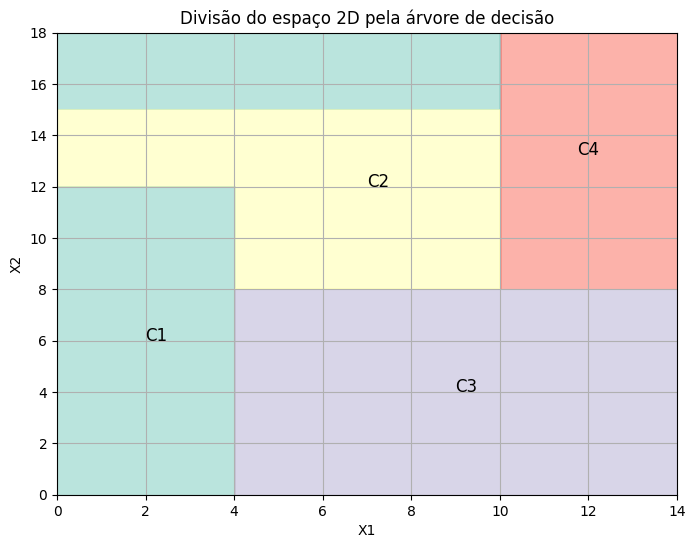

In [ ]:
# Questão 6
# B)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_tree_class(x1, x2):
    """
    Função que implementa a árvore de decisão para classificar pontos no espaço 2D
    """
    # C3
    if x1 > 4 and x2 <= 8:
        return 3

    # Lado esquerdo (X1 <= 4)
    if x1 <= 4:
        if x2 <= 12:
            return 1      # C1
        elif x2 <= 15:
            return 2      # C2
        else:
            return 1      # C1

    # Lado direito superior
    if x1 > 4 and x2 > 8:
        if x1 > 10:
            return 4      # C4
        else:
            if x2 > 15:
                return 1  # C1
            else:
                return 2  # C2

# Geração da malha
x1_vals = np.linspace(0, 14, 400)
x2_vals = np.linspace(0, 18, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

Z = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = decision_tree_class(X1[i, j], X2[i, j])

cmap = ListedColormap(["#8dd3c7", "#ffffb3", "#bebada", "#fb8072"])

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)

# Classe labels
plt.text(2, 6, "C1", fontsize=12)
plt.text(7, 12, "C2", fontsize=12)
plt.text(9, 4, "C3", fontsize=12)
plt.text(11.75, 13.25, "C4", fontsize=12)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Divisão do espaço 2D pela árvore de decisão")
plt.grid(True)
plt.show()


In [ ]:
# Questão 6
# C)
# Sabendo-se que X1 = 3.5 e X2 = ?, a amostra segue pelo ramo X1 ≤ 4 da árvore. 
# O próximo teste seria em relação ao atributo X2, porém esse valor não está disponível.
# Nesse caso, aplica-se o método probabilístico, no qual a amostra não é enviada para apenas um ramo, 
# mas considerada em todos os caminhos possíveis a partir daquele nó. A decisão final é feita observando qual
# classe aparece com maior frequência nas folhas alcançáveis dessa subárvore.
# Observando, sabe-se que as classes possíveis são C1, C2 e C1. Como temos 2/3 de chances de ser classe C1 e 1/3 de ser C2,
# a amostra seria classificada como C1.

In [40]:
# Questão 7
# A)

In [41]:
# Questão 7
# B)

In [42]:
# Questão 7
# C)

In [ ]:
# Questão 8
 # Não estou conseguindo acessar o link

In [ ]:
# Questão 9

market_basket_path = pathlib.Path().absolute() / 'db' / 'Market_Basket_Optimisation.txt'
# df = pd.read_csv(market_basket_path, header=None)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 2, saw 6


In [45]:
##################### QUESTÕES TEÓRICAS #####################

In [ ]:
# Questão 1
# a) “Quanto mais variáveis de entrada forem usadas em um modelo de aprendizado de 
# máquina, melhor será a qualidade do modelo”. 

# Resposta: Depende, pois, embora mais variáveis possam fornecer mais informações, 
# elas também podem conter muitos dados ruidosos, faltantes, ou até mesmo dados irrelevantes, 
# oque pode fazer com que o modelo aprenda padrões incorretos.


In [ ]:
# Questão 1
# b) “Independente da qualidade, quanto mais amostras forem obtidas para uma base de 
# dados, maior a tendência de se obter modelos mais adequados”.

# Resposta: Falso, pois, a qualidade dos dados é crucial, visto que dados de baixa qualidade podem introduzir ruído.
# Logo, não adianta ter muitos dados se eles não forem confiáveis.

In [48]:
# Questão 1
# c) “Às vezes com simples manipulações na base de dados (limpeza, conversão de valores, 
# etc.) pode-se conseguir melhoras significativas nos resultados, sem fazer nenhuma 
# alteração na técnica de aprendizado de máquina usada”. 

# Resposta: Verdade, pois, técnicas de pré-processamento de dados pode melhorar a qualidade dos dados,
# o que pode levar a melhores resultados sem alterar o modelo.

In [49]:
# Questão 2

# Investimento conservador
# Valor Esperado = 30000*0,1 + 5000*0,5 + −10000*0,4
# Valor Esperado = 3000 + 2500 − 4000 = 1500

# Investimento especulativo
# Valor Esperado = 40000*0,1 + 10000*0,5 + −30000*0,4
# Valor Esperado = 4000 + 5000 − 12000 = -3000

# Investimento cíclico
# Valor Esperado = -10000*0,1 + 0*0,5 + 15000*0,4
# Valor Esperado = -1000 + 0 + 6000 = 5000

# Portanto, o investimento mais apropriado é o cíclico, pois se obtem o maior lucro esperado.

In [ ]:
# Questão 3

# O desempenho do Random Forest depende do equilíbrio entre a força das árvores e a correlação entre elas. 
# Árvores fortes aumentam a qualidade das decisões, enquanto baixa correlação permite que os erros de uma árvore sejam
# compensados pelas outras, resultando em um modelo mais robusto.